#  <font color='blue'>Rede Neural com Programação e Matemática</font>
#   <font color='blue'>Para prever a ocorrência de câncer</font>


Teremos 2 Partes:

- Parte 1 - Vamos construir uma rede neural artificial somente com operações matemáticas
- Parte 2 - Vamos treinar a rede para Prever a Ocorrência de Câncer

## A Arquitetura de Redes Neurais Artificiais

Uma rede neural típica é constituída por um conjunto de neurônios interligados, infuenciando uns aos outros formando um sistema maior, capaz de armazenar conhecimento adquirido por meio de exemplos apresentados e, assim, podendo realizar inferências sobre novos conjuntos de dados. Vejamos a arquitetura de redes neurais artificiais.

As redes neurais são comumente apresentadas como um grafo orientado, onde os vértices são os neurônios e as arestas as sinapses. A direção das arestas informa o tipo de alimentação, ou seja, como os neurônios são alimentados (recebem sinais de entrada). As redes neurais derivam seu poder devido a sua estrutura massiva e paralela e a habilidade de aprender por experiência. Essa experiência é transmitida por meio de exemplos obtidos do mundo real, definidos como um conjunto de características formados por dados de entrada e de saída. Se apresentamos esses dados de entrada e saída à rede, estamos diante de aprendizagem supervsionada e caso apresentemos apenas os dados de entrada, estamos diante de aprendizagem não supervisionada!

O conhecimento obtido pela rede através dos exemplos é armazenado na forma de pesos das conexões, os quais serão ajustados a fim de tomar decisões corretas a partir de novas entradas, ou seja, novas situações do mundo real não conhecidas pela rede. O processo de ajuste dos pesos sinapticos é realizado pelo algoritmo de aprendizagem, responsável em armazenar na rede o conhecimento do mundo real obtido atraves de exemplos. Existem vários algoritmos de aprendizagem, dentre eles o backpropagation que é o algoritmo mais utilizado.


### Importando os Pacotes

In [1]:
# Por enquanto precisaremos somente do NumPy
import numpy as np

### Parte 1 - Implementando Uma Rede Neural Artificial Somente com Fórmulas Matemáticas (Sem Frameworks)

### Parte 1A - Forward Propagation

### Desenvolvendo a Função Para Inicialização de Pesos

In [2]:
# Função para inicialização randômica dos parâmetros do modelo
def inicializa_parametros(dims_camada_entrada):
    
    # Dicionário para os parâmetros
    parameters = {}
    
    # Comprimento das dimensões das camadas
    comp = len(dims_camada_entrada)
    
    # Loop pelo comprimento
    for i in range(1, comp):
        
        # Inicialização da matriz de pesos
        parameters["W" + str(i)] = np.random.randn(dims_camada_entrada[i], dims_camada_entrada[i - 1]) * 0.01
        
        # Inicialização do bias
        parameters["b" + str(i)] = np.zeros((dims_camada_entrada[i], 1))
    
    return parameters

### Desenvolvendo a Função Sigmóide

A principal razão pela qual usamos a função sigmóide é porque ela permite converter números para valores entre 0 e 1. 

Portanto, é especialmente usada para modelos em que temos que prever a probabilidade como uma saída. Como a probabilidade de qualquer coisa existir apenas entre o intervalo de 0 e 1, sigmoide é a escolha certa.

In [3]:
# Função sigmóide
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z

### Desenvolvendo a Função ReLU

Para usar a descida de gradiente estocástico com retropropagação de erros para treinar redes neurais profundas, é necessária uma função de ativação que se assemelhe e atue como uma função linear, mas é, de fato, uma função não linear que permite que relacionamentos complexos nos dados sejam aprendidos.

A solução é usar a função de ativação linear retificada ou ReL para abreviar. Um nó ou unidade que implementa essa função de ativação é chamado de unidade de ativação linear retificada ou ReLU, para abreviar. Frequentemente, as redes que usam a função retificadora para as camadas ocultas são chamadas de redes retificadas.

A função ReLU é definida como 𝑓(𝑥) = max (0, 𝑥). Normalmente, ela é aplicada elemento a elemento à saída de alguma outra função, como um produto de vetor e matriz. 

In [4]:
# Função de ativação ReLu (Rectified Linear Unit)
def relu(Z):
    A = abs(Z * (Z > 0))
    return A, Z

### Desenvolvendo a Ativação Linear

In [5]:
# Operação de ativação
# A é a matriz com os dados de entrada
# W é a matriz de pesos
# b é o bias
def linear_activation(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

### Construindo o Processo de Forward Propagation

In [6]:
# Movimento para frente (forward)
def forward(A_prev, W, b, activation):
    
    # Se a função de ativação for Sigmoid, entramos neste bloco
    if activation == "sigmoid":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    # Se não, se for ReLu, entramos neste bloco    
    elif activation == "relu":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

### Combinando Ativação e Propagação

In [7]:
# Propagação para frente
def forward_propagation(X, parameters):
    
    # Lista de valores anteriores (cache)
    caches = []
    
    # Dados de entrada
    A = X
    
    # Comprimento dos parâmetros
    L = len(parameters) // 2
   
    # Loop
    for i in range(1, L):
      
        # Guarda o valor prévio de A
        A_prev = A
        
        # Executa o forward
        A, cache = forward(A_prev, parameters["W" + str(i)], parameters["b" + str(i)], activation = "relu")
        
        # Grava o cache
        caches.append(cache)
    
    # Saída na última camada
    A_last, cache = forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    
    # Grava o cache
    caches.append(cache)
    
    return(A_last, caches)

### Desenvolvendo a Função de Custo

In [8]:
# Função de custo (ou função de erro)
def calcula_custo(A_last, Y):
    
    # Ajusta o shape de Y para obter seu comprimento (total de elementos)
    m = Y.shape[1]
    
    # Calcula o custo comparando valor real e previso
    custo = (-1 / m) * np.sum((Y * np.log(A_last)) + ((1 - Y) * np.log(1 - A_last)))
    
    # Ajusta o shape do custo
    custo = np.squeeze(custo)
    
    return(custo)

### Parte 1B - Backward Propagation

### Desenvolvendo o Backward Propagation - Função Sigmóide Backward

In [9]:
# Função sigmoid para o backpropagation 
# Fazemos o cálculo da derivada pois não queremos o valor completo da função, mas sim sua variação
def sigmoid_backward(da, Z):
    
    # Calculamos a derivada de Z
    dg = (1 / (1 + np.exp(-Z))) * (1 - (1 / (1 + np.exp(-Z))))
    
    # Encontramos a mudança na derivada de z
    dz = da * dg
    return dz

# Compare com a função sigmoid do forward propagation
# A = 1 / (1 + np.exp(-Z))

### Desenvolvendo o Backward Propagation - Função ReLu Backward

In [10]:
# Função relu para o backpropagation 
# Fazemos o cálculo da derivada pois não queremos o valor completo da função, mas sim sua variação
def relu_backward(da, Z):
    
    dg = 1 * ( Z >= 0)
    dz = da * dg
    return dz

# Compare com a função relu do forward propagation:
# A = abs(Z * (Z > 0))

### Desenvolvendo o Backward Propagation - Ativação Linear Backward

In [11]:
# Ativação linear para o backpropagation
def linear_backward_function(dz, cache):
    
    # Recebe os valores do cache (memória)
    A_prev, W, b = cache
    
    # Shape de m
    m = A_prev.shape[1]
    
    # Calcula a derivada de W (resultado da operação com dz)
    dW = (1 / m) * np.dot(dz, A_prev.T)
    
    # Calcula a derivada de b (resultado da operação com dz)
    db = (1 / m) * np.sum(dz, axis = 1, keepdims = True)
    
    # Calcula a derivada da operação
    dA_prev = np.dot(W.T, dz)
    
    return dA_prev, dW, db

### Desenvolvendo o Backward Propagation - Ativação Linear Backward

In [12]:
# Função que define o tipo de ativação (relu ou sigmoid)
def linear_activation_backward(dA, cache, activation):
    
    # Extrai o cache
    linear_cache, activation_cache = cache
    
    # Verifica se a ativação é relu
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    # Verifica se a ativação é sigmoid
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    return dA_prev, dW, db

### Combinando Ativação e Retropropagação - Algoritmo Backpropagation

In [13]:
# Algoritmo Backpropagation (calcula os gradientes para atualização dos pesos)
# AL = Valor previsto no Forward
# Y = Valor real
def backward_propagation(AL, Y, caches):
    
    # Dicionário para os gradientes
    grads = {}
    
    # Comprimento dos dados (que estão no cache)
    L = len(caches)
    
    # Extrai o comprimento para o valor de m
    m = AL.shape[1]
    
    # Ajusta o shape de Y
    Y = Y.reshape(AL.shape)
    
    # Calcula a derivada da previsão final da rede (feita ao final do Forward Propagation)
    dAL = -((Y / AL) - ((1 - Y) / (1 - AL)))
    
    # Captura o valor corrente do cache
    current_cache = caches[L - 1]
    
    # Gera a lista de gradiente para os dados, os pesos e o bias
    # Fazemos isso uma vez, pois estamos na parte final da rede, iniciando o caminho de volta
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # Loop para calcular a derivada durante as ativações lineares com a relu
    for l in reversed(range(L - 1)):
        
        # Cache atual
        current_cache = caches[l]
        
        # Calcula as derivadas
        dA_prev, dW, db = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        
        # Alimenta os gradientes na lista, usando o índice respectivo
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db
        
    return grads

### Gradientes e Atualização dos Pesos

In [14]:
# Função de atualização de pesos
def atualiza_pesos(parameters, grads, learning_rate):
    
    # Comprimento da estrutura de dados com os parâmetros (pesos e bias)
    L = len(parameters)//2
    
    # Loop para atualização dos pesos
    for l in range(L):
        
        # Atualização dos pesos
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - (learning_rate * grads["dW" + str(l + 1)])
        
        # Atualização do bias
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - (learning_rate * grads["db" + str(l + 1)])
    
    return parameters

### Implementando a Rede Completa

In [15]:
# Modelo completo da rede neural
def modeloNN(X, Y, dims_camada_entrada, learning_rate = 0.0075, num_iterations = 100):
    
    # Lista para receber o custo a cada época de treinamento
    custos = []
    
    # Inicializa os parâmetros
    parametros = inicializa_parametros(dims_camada_entrada)
    
    # Loop pelo número de iterações (épocas)
    for i in range(num_iterations):
        
        # Forward Propagation
        AL, caches = forward_propagation(X, parametros)
        
        # Calcula o custo
        custo = calcula_custo(AL, Y)
        
        # Backward Propagation
        # Nota: ao invés de AL e Y, poderíamos passar somente o valor do custo
        # Estamos passando o valor de AL e Y para fique claro didaticamente o que está sendo feito
        gradientes = backward_propagation(AL, Y, caches)
        
        # Atualiza os pesos
        parametros = atualiza_pesos(parametros, gradientes, learning_rate)
        
        # Print do valor intermediário do custo
        # A redução do custo indica o aprendizado do modelo
        if i % 10 == 0:
            print("Custo Após " + str(i) + " iterações é " + str(custo))
            custos.append(custo)
            
    return parametros, custos 

In [16]:
# Função para fazer as previsões
# Não precisamos do Backpropagation pois ao fazer previsões como o modelo treinado, 
# teremos os melhores valores de pesos (parametros)
def predict(X, parametros):
    AL, caches = forward_propagation(X, parametros)
    return AL

### Parte 2 - Vamos treinar a rede para Prever a Ocorrência de Câncer

### Usando a Rede Neural Para Prever a Ocorrência de Câncer

In [17]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Carregando os Dados

https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

In [18]:
# Carregamos o objeto completo
temp = load_breast_cancer()

In [19]:
# Tipo do objeto
type(temp)

sklearn.utils._bunch.Bunch

In [20]:
# Carregamos o dataset
dados = pd.DataFrame(columns = load_breast_cancer()["feature_names"], data = load_breast_cancer()["data"])

In [21]:
# Shape
dados.shape

(569, 30)

In [22]:
# Visualiza os dados
dados.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# Verifica se temos valores ausentes
dados.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [24]:
# Separa a variável target
target = load_breast_cancer()["target"]

In [25]:
type(target)

numpy.ndarray

In [26]:
# Visualiza a variável
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
# Total de registros por classe - Câncer Benigno
np.count_nonzero(target == 1)

357

In [28]:
# Total de registros por classe - Câncer Maligno
np.count_nonzero(target == 0)

212

In [29]:
# Vamos extrair os labels

# Dicionário para os labels
labels = {}

# Nomes das classes da variável target
target_names = load_breast_cancer()["target_names"]

# Mapeamento
for i in range(len(target_names)):
    labels.update({i:target_names[i]})

In [30]:
# Visualiza os labels
labels

{0: 'malignant', 1: 'benign'}

In [31]:
# Agora preparamos as variáveis preditoras em X
X = np.array(dados)

In [32]:
# Visualiza os dados de entrada
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [33]:
# Dividimos os dados de entrada e saída em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, target, test_size = 0.15, shuffle = True)

In [34]:
# Shape dos dados de treino
print(X_treino.shape)
print(y_treino.shape)

(483, 30)
(483,)


In [35]:
# Shape dos dados de teste
print(X_teste.shape)
print(y_teste.shape)

(86, 30)
(86,)


In [36]:
# Ajusta o shape dos dados de entrada
X_treino = X_treino.T
X_teste = X_teste.T

In [37]:
print(X_treino.shape)
print(X_teste.shape)

(30, 483)
(30, 86)


In [38]:
# Precisamos ajustar também os dados de saída
y_treino = y_treino.reshape(1, len(y_treino))
y_teste = y_teste.reshape(1, len(y_teste))

In [39]:
print(y_treino.shape)
print(y_teste.shape)

(1, 483)
(1, 86)


In [40]:
# Variável com as dimensões de entrada para oo número de neurônios 
dims_camada_entrada = [X_treino.shape[0], 50, 20, 5, 1]

In [41]:
dims_camada_entrada

[30, 50, 20, 5, 1]

In [42]:
# Treinamento do modelo

print("\nIniciando o Treinamento.\n")

parametros, custo = modeloNN(X = X_treino, 
                             Y = y_treino, 
                             dims_camada_entrada = dims_camada_entrada, 
                             num_iterations = 3000, 
                             learning_rate = 0.0075)

print("\nTreinamento Concluído.\n")


Iniciando o Treinamento.

Custo Após 0 iterações é 0.6931586051946469
Custo Após 10 iterações é 0.6919231567939768
Custo Após 20 iterações é 0.6907332475351402
Custo Após 30 iterações é 0.689587220505194
Custo Após 40 iterações é 0.6884833512660833
Custo Após 50 iterações é 0.6874202011107614
Custo Após 60 iterações é 0.6863965996838122
Custo Após 70 iterações é 0.6854108997655455
Custo Após 80 iterações é 0.6844615336832564
Custo Após 90 iterações é 0.6835470974525386
Custo Após 100 iterações é 0.682666280455474
Custo Após 110 iterações é 0.6818178324152033
Custo Após 120 iterações é 0.681000538290637
Custo Após 130 iterações é 0.6802132439887497
Custo Após 140 iterações é 0.6794548450701345
Custo Após 150 iterações é 0.6787242534121732
Custo Após 160 iterações é 0.6780204521561602
Custo Após 170 iterações é 0.6773424476855631
Custo Após 180 iterações é 0.6766892771027982
Custo Após 190 iterações é 0.6760600102945762
Custo Após 200 iterações é 0.6754537861809601
Custo Após 210 iteraç

Custo Após 1790 iterações é 0.4015222646435661
Custo Após 1800 iterações é 0.39734758514401913
Custo Após 1810 iterações é 0.3948215886348465
Custo Após 1820 iterações é 0.3840756824770205
Custo Após 1830 iterações é 0.38329794035752807
Custo Após 1840 iterações é 0.3760344341097798
Custo Após 1850 iterações é 0.372098094690303
Custo Após 1860 iterações é 0.3719897439904972
Custo Após 1870 iterações é 0.36630934401482307
Custo Após 1880 iterações é 0.36074598825431053
Custo Após 1890 iterações é 0.35735597318667295
Custo Após 1900 iterações é 0.3600790680212956
Custo Após 1910 iterações é 0.35605917422966193
Custo Após 1920 iterações é 0.35217508765697486
Custo Após 1930 iterações é 0.35057546529469324
Custo Após 1940 iterações é 0.34979258385444784
Custo Após 1950 iterações é 0.3435883235492139
Custo Após 1960 iterações é 0.3436902887938579
Custo Após 1970 iterações é 0.34386832025269914
Custo Após 1980 iterações é 0.34363603569053247
Custo Após 1990 iterações é 0.3392308781701936
Cus

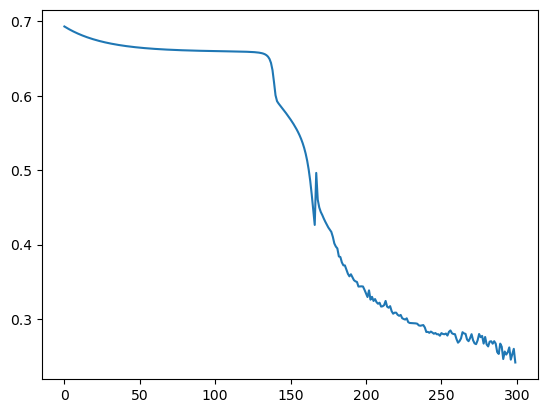

In [43]:
# Plot do erro durante o treinamento
plt.plot(custo)

In [44]:
# Previsões com os dados de treino
y_pred_treino = predict(X_treino, parametros)

In [46]:
# Ajustamos o shape em treino
y_pred_treino = y_pred_treino.reshape(-1)
y_treino = y_treino.reshape(-1)

In [48]:
# Convertemos as previsões para o valor binário de classe 
# (0 ou 1, usando como threshold o valor de 0.5 da probabilidade)
y_pred_treino = 1 * (y_pred_treino > 0.5)

In [50]:
# Calculamos a acurácia comparando valor real com valor previsto
acc_treino = sum(1 * (y_pred_treino == y_treino)) / len(y_pred_treino) * 100

In [51]:
print("Acurácia nos dados de treino: " + str(acc_treino))

Acurácia nos dados de treino: 90.47619047619048


In [52]:
print(classification_report(y_treino, y_pred_treino, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.99      0.75      0.85       179
     Benigno       0.87      0.99      0.93       304

    accuracy                           0.90       483
   macro avg       0.93      0.87      0.89       483
weighted avg       0.91      0.90      0.90       483



In [53]:
# Previsões com o modelo usando dados de teste
y_pred_teste = predict(X_teste, parametros)

In [55]:
# Ajustamos os shapes
y_pred_teste = y_pred_teste.reshape(-1)
y_teste = y_teste.reshape(-1)

In [56]:
# Convertemos as previsões para o valor binário de classe
y_pred_teste = 1 * (y_pred_teste > 0.5)

In [57]:
# Visualizamos as previsões
y_pred_teste

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [58]:
# Calculamos a acurácia
acuracia = sum(1 * (y_pred_teste == y_teste)) / len(y_pred_teste) * 100

In [59]:
print("Acurácia nos dados de teste: " + str(acuracia))

Acurácia nos dados de teste: 90.69767441860465


In [60]:
print(classification_report(y_teste, y_pred_teste, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       1.00      0.76      0.86        33
     Benigno       0.87      1.00      0.93        53

    accuracy                           0.91        86
   macro avg       0.93      0.88      0.90        86
weighted avg       0.92      0.91      0.90        86



Já podemos concluir o projeto aqui, pois já temos um modelo para Prever a Ocorrência de Câncer com 91% de acurrasia.